# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation

# Importing libraries and getting an overview of the dataset:

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

product_sales = pd.read_csv('product_sales.csv')

In [41]:
print(product_sales.head())

   week  sales_method  ... nb_site_visits      state
0     2         Email  ...             24    Arizona
1     6  Email + Call  ...             28     Kansas
2     5          Call  ...             26  Wisconsin
3     4         Email  ...             25    Indiana
4     3         Email  ...             28   Illinois

[5 rows x 8 columns]


In [42]:
print(product_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None


# Data Validation & Cleaning:

Ensuring all columns are of the correct data type (changing sales_method and state columns to categorical):

In [43]:
product_sales['sales_method'] = product_sales['sales_method'].astype('category')
product_sales['state'] = product_sales['state'].astype('category')

print(product_sales.dtypes)

week                    int64
sales_method         category
customer_id            object
nb_sold                 int64
revenue               float64
years_as_customer       int64
nb_site_visits          int64
state                category
dtype: object


Removing duplicate rows if present:

In [44]:
product_sales = product_sales.drop_duplicates()

Ensuring consistency of entries in sales method and state columns:

In [45]:
print(product_sales['sales_method'].unique())
print(product_sales['state'].unique())

['Email', 'Email + Call', 'Call', 'em + call', 'email']
Categories (5, object): ['Call', 'Email', 'Email + Call', 'em + call', 'email']
['Arizona', 'Kansas', 'Wisconsin', 'Indiana', 'Illinois', ..., 'Vermont', 'Rhode Island', 'Nevada', 'Idaho', 'Wyoming']
Length: 50
Categories (50, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


Fixing non-uniformity in sales method column:

In [46]:
product_sales['sales_method'] = product_sales['sales_method'].str.lower().str.strip()
product_sales['sales_method'] = product_sales['sales_method'].replace('em + call', 'email + call')
product_sales['sales_method'] = product_sales['sales_method'].str.title()

print(product_sales['sales_method'].unique())

['Email' 'Email + Call' 'Call']


Checking for outliers in the years_as_customer column, given the company was founded in 1984 it's impossible for a customer to have been a customer for more than 39-40 years:

In [47]:
outliers = product_sales[(product_sales['years_as_customer'] > 39)]
print(outliers)

       week sales_method  ... nb_site_visits       state
13741     2        Email  ...             24  California
13800     4         Call  ...             27  California

[2 rows x 8 columns]


Removing outliers from the years_as_customer column. Chose to remove rather than imputing values as I have no way to know whether it's simply an error in data entry for this column or if the whole row is erroneous. I think removing the rows is reasonable as only 2 columns are affected and such removing them isn't likely to have too much of an impact on the analysis:

In [48]:
product_sales = product_sales[product_sales['years_as_customer'] <= 39]

Examining the nature of the missing values in the revenue column:

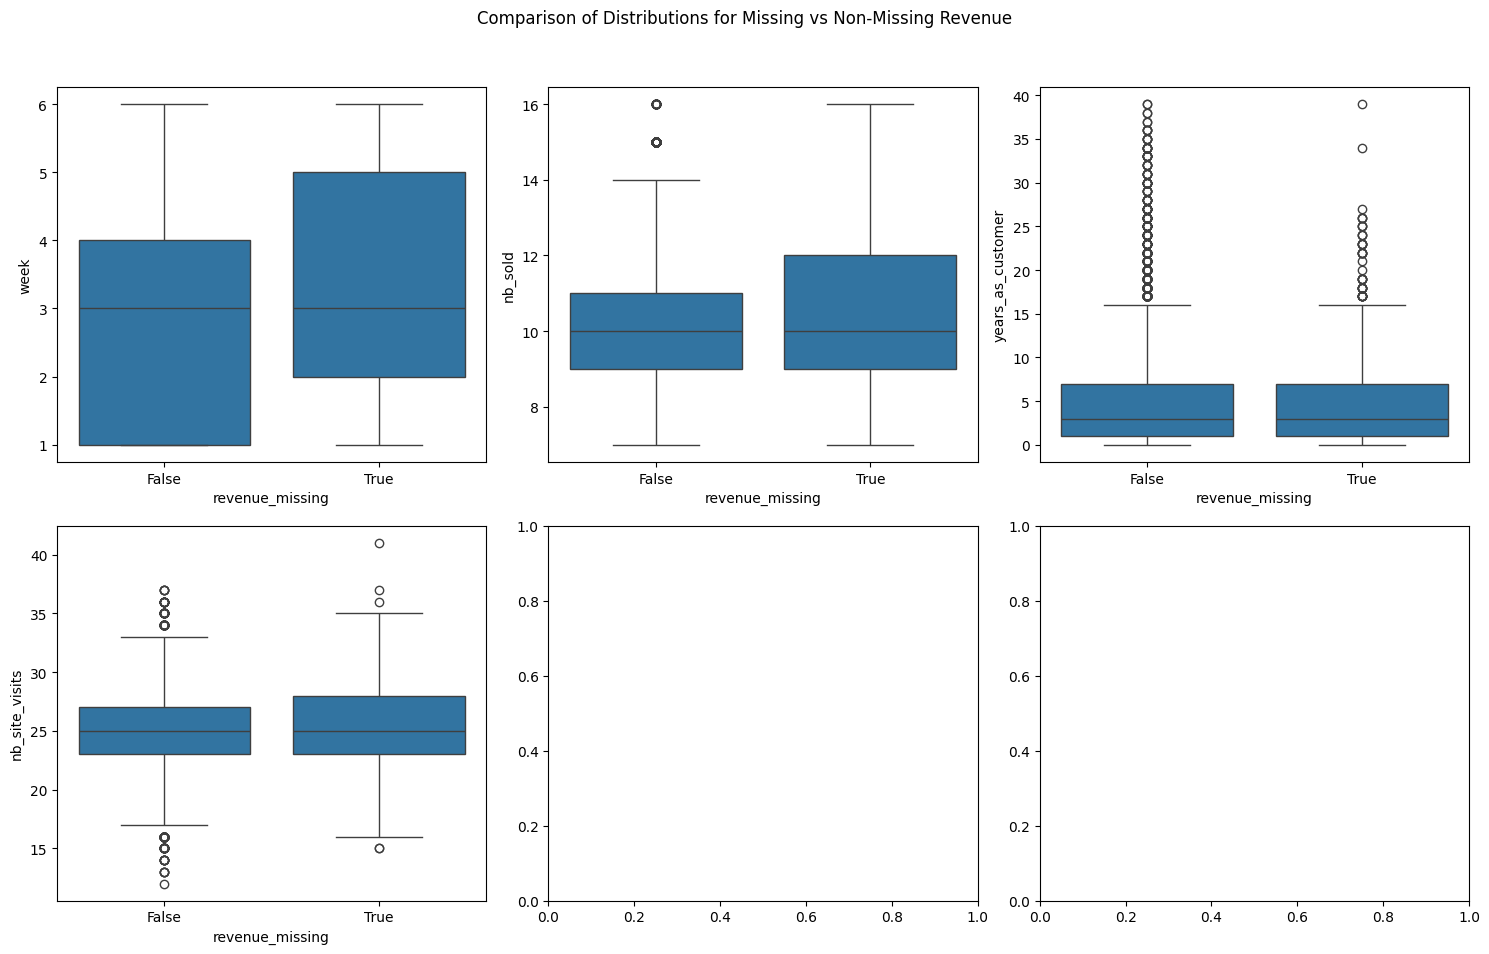

Missing Revenue by sales_method:
sales_method
Call            0.036485
Email           0.072873
Email + Call    0.135692
Name: revenue_missing, dtype: float64


Missing Revenue by state:
state
Alabama           0.056075
Alaska            0.125000
Arizona           0.080997
Arkansas          0.106061
California        0.071123
Colorado          0.078261
Connecticut       0.067039
Delaware          0.205882
Florida           0.086283
Georgia           0.059305
Hawaii            0.069444
Idaho             0.048387
Illinois          0.066451
Indiana           0.076271
Iowa              0.066667
Kansas            0.091549
Kentucky          0.051643
Louisiana         0.073913
Maine             0.047619
Maryland          0.068441
Massachusetts     0.081633
Michigan          0.064257
Minnesota         0.069388
Mississippi       0.043165
Missouri          0.080386
Montana           0.044444
Nebraska          0.054945
Nevada            0.049020
New Hampshire     0.094340
New Jersey        0.0737

week                           ... nb_site_visits                  
                   count      mean       std  min  ...            25%   50%   75%   max
revenue_missing                                    ...                                 
False            13924.0  3.078282  1.650725  1.0  ...           23.0  25.0  27.0  37.0
True              1074.0  3.357542  1.709222  1.0  ...           23.0  25.0  28.0  41.0

[2 rows x 32 columns]

In [49]:
product_sales['revenue_missing'] = product_sales['revenue'].isnull()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Comparison of Distributions for Missing vs Non-Missing Revenue')

variables_to_compare = ['week', 'nb_sold', 'years_as_customer', 'nb_site_visits']

for i, var in enumerate(variables_to_compare):
    sns.boxplot(x='revenue_missing', y=var, data=product_sales, ax=axes[i//3, i%3])

if len(variables_to_compare) % 2 != 0:
    fig.delaxes(axes[1, 2])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

categorical_vars = ['sales_method', 'state']
for var in categorical_vars:
    print(f"Missing Revenue by {var}:")
    print(product_sales.groupby(var)['revenue_missing'].mean())
    print("\n")

summary_stats_by_missing_revenue = product_sales.groupby('revenue_missing')[variables_to_compare].describe()
summary_stats_by_missing_revenue


The distributions of week, nb_sold, years_as_customer and nb_site_visits can differ somewhat between the groups with missing and non-missing values in the revenue column. This suggests the data is likely not missing completely at random.
For rows with missing revenue, the average nb_sold and nb_site_visits are slightly higher.
The week variable shows a slightly higher mean in the missing revenue group.
The rate of missing revenue also varies across different sales_method and state categories. This suggests a potential relationship between these categorical variables and the missingness of revenue.

If we know the data is not missing completely at random, I don't think imputing the sample mean for the missing values makes sense, however, we also don't have sufficient evidence to say confidently that the data is missing not at random.

Given this information, I think there are 2 options for dealing with the missing revenue values. Either use a linear regression model to impute the values based on the week, nb_sold, years_as_customer, nb_site_visits, state and sales_method columns, which risks introducing bias to the results, or to just delete the rows with missing revenue values completely.

I think, given the fact the missing revenue values only make up 7.1% of the data and the fact that using a linear regression model trained on this data could introduce bias, the best way to deal with these missing values is to delete the rows with the missing values.

In [50]:
product_sales = product_sales.dropna(subset=['revenue'])

Asserting all customer ids are unique:

In [51]:
assert product_sales['customer_id'].is_unique

# **Data Exploration:**

Exploring distribution of number of products sold to each customer:

16
7
10.040074691180696
1.7898185062476062


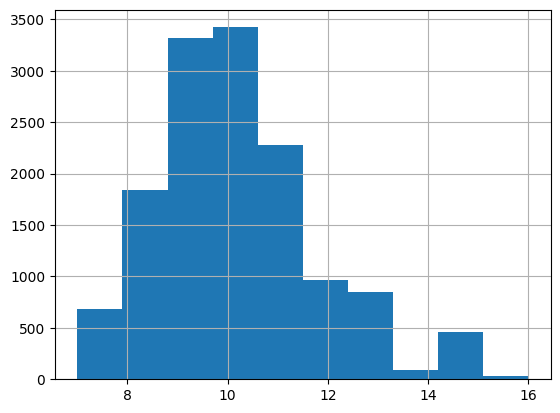

In [52]:
print(product_sales['nb_sold'].max())
print(product_sales['nb_sold'].min())
print(product_sales['nb_sold'].mean())
print(product_sales['nb_sold'].std())
product_sales['nb_sold'].hist()

plt.show()

Looks like the average number of products is around 10, with a relatively low standard deviation showing that people rarely buy less than 8 or more than 12 products.

Exploring the sales methods:

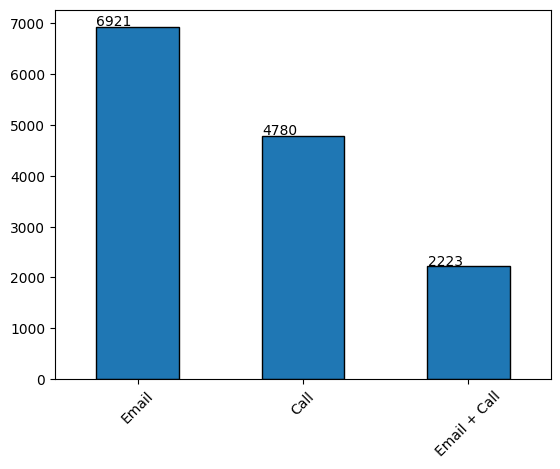

In [53]:
sales_method_counts = product_sales['sales_method'].value_counts()
ax = sales_method_counts.plot(kind='bar', edgecolor='black')

plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

Looks like Email is generally the preferred method for most customers, with about half using solely email, however a decent amount still use the phone and about 17% of customers use a mixture of both.

Exploring the spread of the revenue:

In [54]:
print(product_sales['revenue'].describe())

count    13924.000000
mean        93.937828
std         47.437281
min         32.540000
25%         52.470000
50%         89.500000
75%        107.330000
max        238.320000
Name: revenue, dtype: float64


In [55]:
print(product_sales.groupby('sales_method')['revenue'].describe())

               count        mean        std  ...     50%     75%     max
sales_method                                 ...                        
Call          4780.0   47.596866   8.610699  ...   49.05   52.68   71.36
Email         6921.0   97.127671  11.211279  ...   95.58  105.17  148.97
Email + Call  2223.0  183.651233  29.083924  ...  184.74  191.11  238.32

[3 rows x 8 columns]


The call method has the lowest average revenue received ($47.60) with a narrower spread, while email had a much higher average revenue ($96.90) than calls. Customers who used both have an even higher average revenue contributed ($171.48).

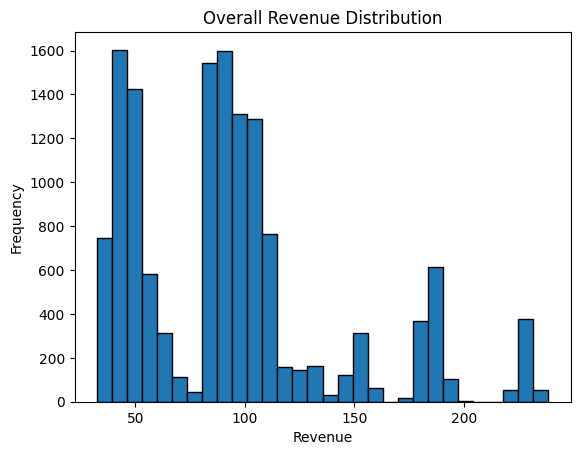

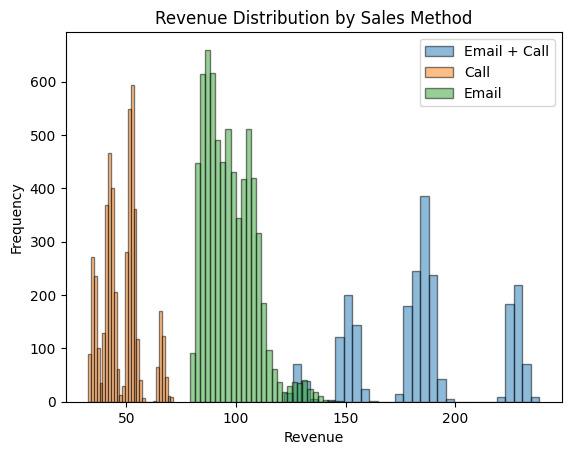

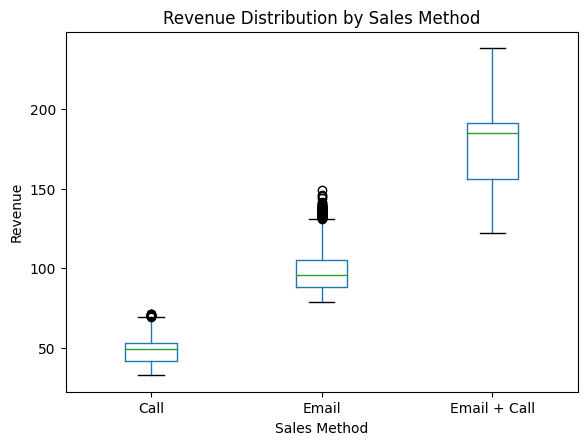

In [56]:
#histogram of rev distribution
plt.hist(product_sales['revenue'].dropna(), bins=30, edgecolor='black')
plt.title('Overall Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

#by sales method
sales_methods = product_sales['sales_method'].unique()

for method in sales_methods:
    subset = product_sales[product_sales['sales_method'] == method]['revenue']
    plt.hist(subset.dropna(), bins=30, alpha=0.5, label=method, edgecolor='black')
plt.title('Revenue Distribution by Sales Method')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#box plot
product_sales.boxplot(by='sales_method', column='revenue', grid=False)
plt.title('Revenue Distribution by Sales Method')
plt.suptitle('')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.show()

Was there any difference in revenue over time for each of the methods?

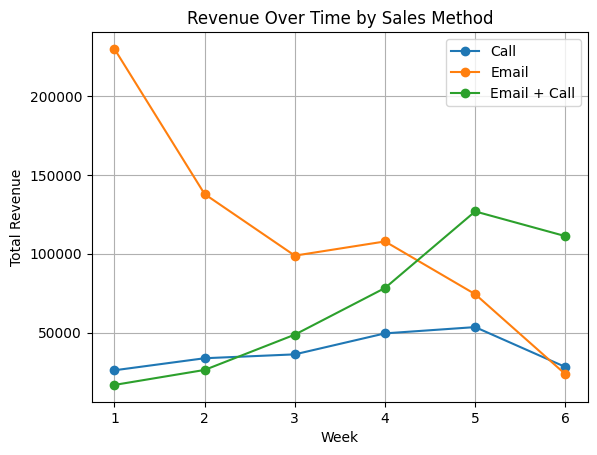

In [57]:
weekly_revenue = product_sales.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()

pivot_table = weekly_revenue.pivot(index='week', columns='sales_method', values='revenue')

for method in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[method], label=method, marker='o')
plt.title('Revenue Over Time by Sales Method')
plt.xlabel('Week')
plt.ylabel('Total Revenue')
plt.legend()
plt.grid(True)
plt.show()

Revenue from the email sales method appears to be decreasing over time, which may seem like a negative trend. However, sending emails tends to require much less effort on the company's side and still results in decent revenue, therefore it doesn't make much sense to discontinue this method, especially given how easy it is to reach a large number of potential customers quickly and easily and how well email sales have performed when compared to telephone ones in the past.

The big increase in revenue from email + call sales shows there is potential there to garner lots of revenue, however, using both emails and calls does require more time and resources from the company, therefore an appropriate approach may be to use email for initial contact with customers, then pivot to calling for follow-ups with engaged or high-potential customers.

I think the best metric for the business to monitor in order to observe for improvements is the average revenue per customer for each sales method. This will allow the business to monitor how the effectiveness of each sales method changes over time.
The monitoring frequency should be monthly, to capture trends and make timely adjustments to sales strategies.

The initial values for this metric were calculated earlier in this report and are as follows:
- Call: $49.29 per customer
- Email: $96.90 per customer
- Email + Call: $171.48 per customer

Monitoring this metric over time will help the business assess the ongoing effectiveness of each sales method and make informed decisions about resource allocation and sales strategies.